In [1]:
 #####Chargement du Dataset et Exploration des Colonnes
import pandas as pd

In [2]:
# Charger le dataset
file_path = "C:/Users/WS/Documents/M2IA(M1)/s2/ML/online_retail_II.xlsx"
df = pd.read_excel(file_path)

In [4]:
# Aperçu des données
print(df.head())

  Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price  Customer ID         Country  
0 2009-12-01 07:45:00   6.95      13085.0  United Kingdom  
1 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
2 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
3 2009-12-01 07:45:00   2.10      13085.0  United Kingdom  
4 2009-12-01 07:45:00   1.25      13085.0  United Kingdom  


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB
None


In [9]:
########Distribution des Colonnes Quantité, Prix Unitaire et Valeur Totale
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# Ajouter une colonne 'TotalValue' représentant la valeur totale par commande
df['TotalValue'] = df['Quantity'] * df['Price']

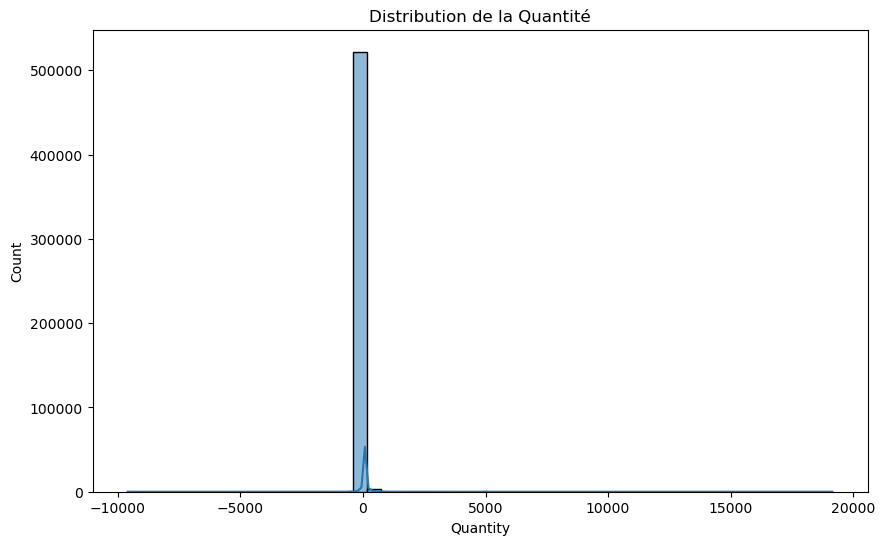

In [13]:
# Distribution de la quantité
plt.figure(figsize=(10, 6))
sns.histplot(df['Quantity'], kde=True, bins=50)
plt.title("Distribution de la Quantité")
plt.show()

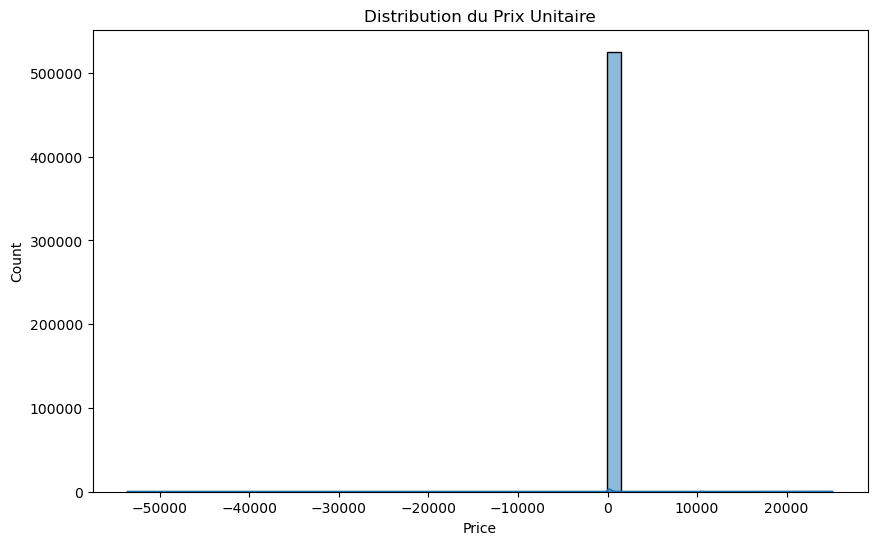

In [14]:
# Distribution du prix unitaire
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], kde=True, bins=50)
plt.title("Distribution du Prix Unitaire")
plt.show()

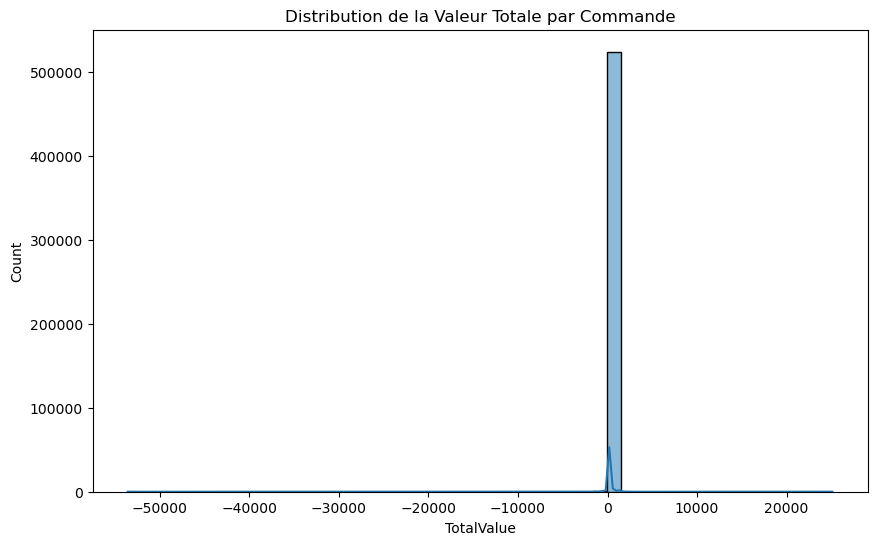

In [15]:
# Distribution de la valeur totale par commande
plt.figure(figsize=(10, 6))
sns.histplot(df['TotalValue'], kde=True, bins=50)
plt.title("Distribution de la Valeur Totale par Commande")
plt.show()

In [19]:
#########Identification des Anomalies
# Factures annulées
cancelled_orders = df[df['Quantity'] < 0]
print(f"Nombre de factures annulées: {len(cancelled_orders)}")

Nombre de factures annulées: 12326


In [21]:
# Clients sans identifiants
missing_customers = df['Customer ID'].isna().sum()
print(f"Nombre de commandes sans identifiant client : {missing_customers}")

Nombre de commandes sans identifiant client : 107927


In [23]:
# Commandes inhabituellement élevées
outliers = df[df['TotalValue'] > df['TotalValue'].quantile(0.99)]
print(f"Nombre de commandes élevées (outliers) : {len(outliers)}")

Nombre de commandes élevées (outliers) : 5234


In [25]:
######Calcul des Indicateurs Clés (Récence, Fréquence, Monétaire)
# Conversion de 'InvoiceDate' au format datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [27]:
# Date de référence pour le calcul de la récence (par exemple, la date maximale + 1 jour)
reference_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)

In [29]:
# Calculer Récence, Fréquence et Montant pour chaque client
rfm = df.groupby('Customer ID').agg({
    'InvoiceDate': lambda date: (reference_date - date.max()).days,
    'Invoice': 'nunique',
    'TotalValue': 'sum'
}).rename(columns={'InvoiceDate': 'Recency', 'Invoice': 'Frequency', 'TotalValue': 'Monetary'})


In [35]:
print(rfm.head())

             Recency  Frequency  Monetary
Customer ID                              
12346.0           67         15    -64.68
12347.0            3          2   1323.32
12348.0           74          1    222.16
12349.0           43          4   2646.99
12351.0           11          1    300.93


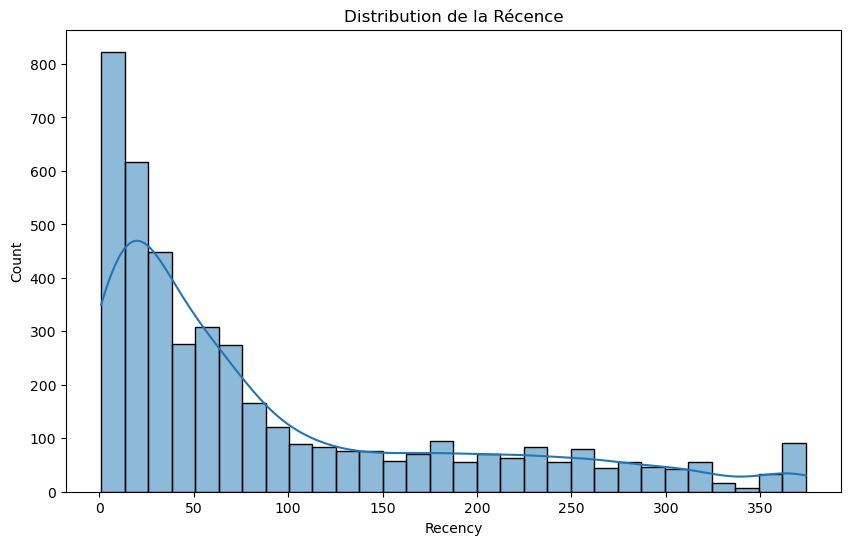

In [37]:
######Visualisation des Distributions et Anomalies
# Visualisation de Récence
plt.figure(figsize=(10, 6))
sns.histplot(rfm['Recency'], kde=True, bins=30)
plt.title("Distribution de la Récence")
plt.show()

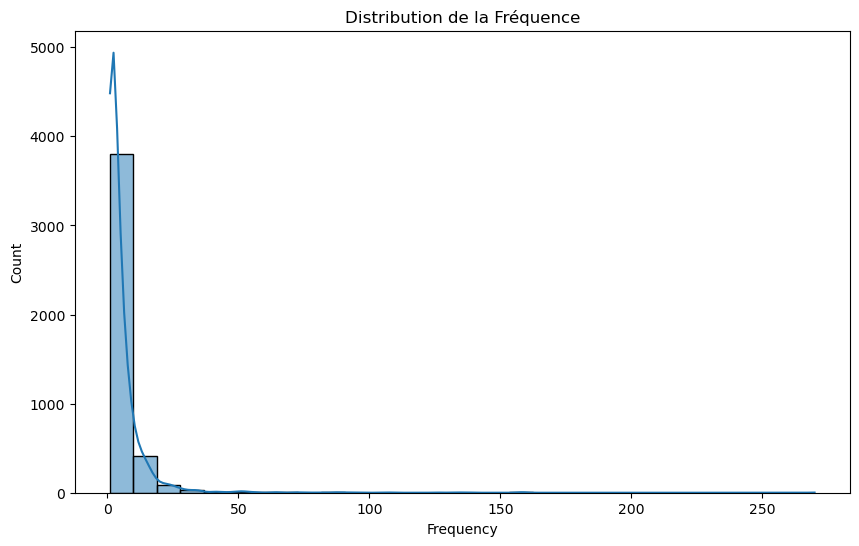

In [39]:
# Visualisation de Fréquence
plt.figure(figsize=(10, 6))
sns.histplot(rfm['Frequency'], kde=True, bins=30)
plt.title("Distribution de la Fréquence")
plt.show()

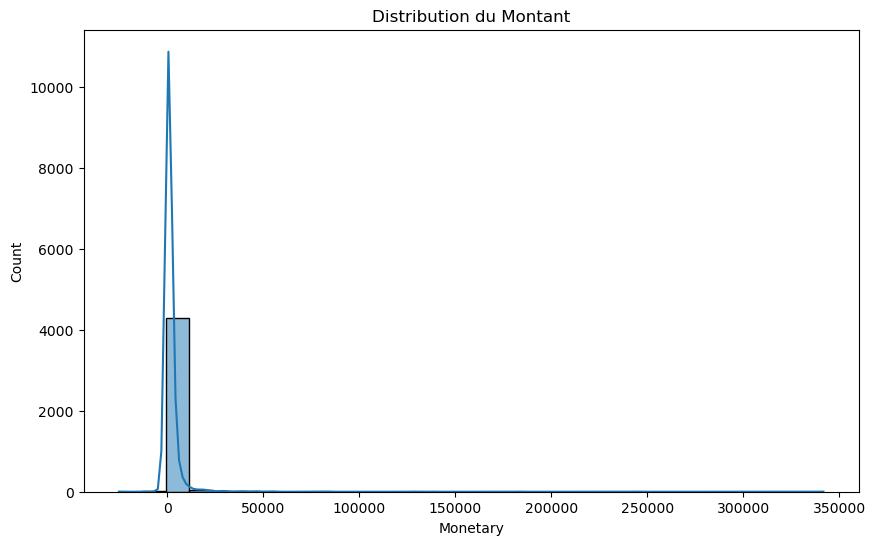

In [41]:
# Visualisation de Montant
plt.figure(figsize=(10, 6))
sns.histplot(rfm['Monetary'], kde=True, bins=30)
plt.title("Distribution du Montant")
plt.show()

In [43]:
#########Gérer les Valeurs Manquantes et Corriger/Exclure les Anomalies
# Supprimer les lignes sans identifiant client
df = df.dropna(subset=['Customer ID'])

In [45]:
# Supprimer les factures avec des quantités négatives
df = df[df['Quantity'] > 0]

In [47]:
# Vérifier les valeurs manquantes restantes
print(df.isna().sum())

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
TotalValue     0
dtype: int64


In [49]:
#######Créer des Variables Dérivées : Montant Total par Commande
# Calculer le montant total dépensé pour chaque ligne de commande
df['TotalSpent'] = df['Quantity'] * df['Price']

In [53]:
# Aperçu des données pour vérifier la nouvelle colonne
print(df[['Customer ID', 'Quantity', 'Price', 'TotalSpent']].head())

   Customer ID  Quantity  Price  TotalSpent
0      13085.0        12   6.95        83.4
1      13085.0        12   6.75        81.0
2      13085.0        12   6.75        81.0
3      13085.0        48   2.10       100.8
4      13085.0        24   1.25        30.0


In [55]:
#######Standardiser les Variables RFM pour le Clustering
###Calculer les indicateurs RFM
from sklearn.preprocessing import StandardScaler

# Calcul de la récence, fréquence et montant pour chaque client
reference_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)
rfm = df.groupby('Customer ID').agg({
    'InvoiceDate': lambda date: (reference_date - date.max()).days,
    'Invoice': 'nunique',
    'TotalSpent': 'sum'
}).rename(columns={'InvoiceDate': 'Recency', 'Invoice': 'Frequency', 'TotalSpent': 'Monetary'})


In [57]:
# Standardiser les colonnes RFM
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm)

In [59]:
# Convertir en DataFrame pour faciliter la visualisation
rfm_scaled = pd.DataFrame(rfm_scaled, columns=['Recency', 'Frequency', 'Monetary'], index=rfm.index)
print(rfm_scaled.head())

              Recency  Frequency  Monetary
Customer ID                               
12346.0      0.760643   0.801436 -0.187895
12347.0     -0.910627  -0.300464 -0.081240
12348.0     -0.178157  -0.422897 -0.204806
12349.0     -0.497968  -0.178031  0.070005
12351.0     -0.828095  -0.422897 -0.195967


In [61]:
######## K-means sur les Données RFM Standardisées
#### Déterminer le Nombre Optimal de Clusters avec la Méthode du Coude
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [62]:
# Calculer l'inertie pour un nombre de clusters de 1 à 10
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    inertia.append(kmeans.inertia_)

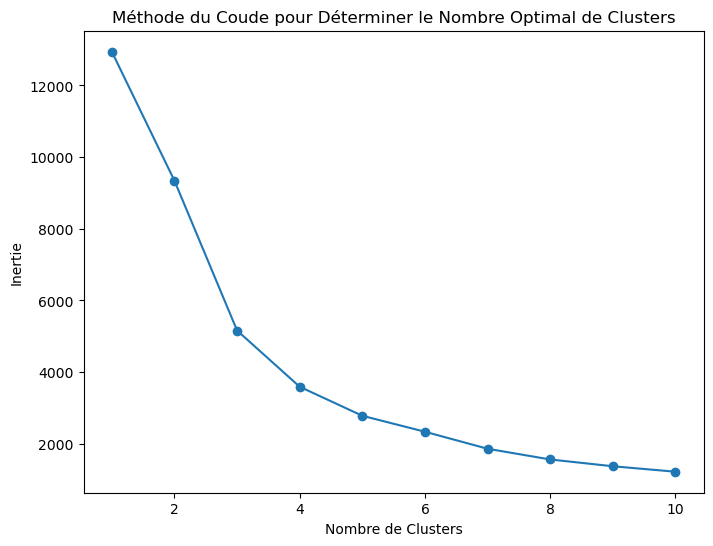

In [65]:
# Tracer la courbe de l'inertie
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Nombre de Clusters')
plt.ylabel("Inertie")
plt.title("Méthode du Coude pour Déterminer le Nombre Optimal de Clusters")
plt.show()

In [67]:
###### Appliquer K-means avec le Nombre de Clusters Optimal
# Choisir le nombre optimal de clusters, ici supposons qu'il est 4
kmeans = KMeans(n_clusters=4, random_state=42)
rfm_scaled['Cluster'] = kmeans.fit_predict(rfm_scaled)

In [69]:
# Afficher le nombre de clients dans chaque cluster
print(rfm_scaled['Cluster'].value_counts())

Cluster
0    3207
1    1049
3      53
2       5
Name: count, dtype: int64


In [71]:
######### Expérimenter d'autres Méthodes de Segmentation
#### DBSCAN
from sklearn.cluster import DBSCAN

# Appliquer DBSCAN (Density-Based Spatial Clustering of Applications with Noise) avec les paramètres initiaux
dbscan = DBSCAN(eps=0.5, min_samples=5)
rfm_scaled['DBSCAN_Cluster'] = dbscan.fit_predict(rfm_scaled)

In [73]:
# Compter les clusters formés
print(rfm_scaled['DBSCAN_Cluster'].value_counts())

DBSCAN_Cluster
 0    3196
 1    1041
-1      72
 2       5
Name: count, dtype: int64


In [75]:
#### Modèle RFM Classique
##Calculer les Scores RFM 
# Calculer des scores R, F, et M en utilisant des quantiles
rfm['R_Score'] = pd.qcut(rfm['Recency'], 5, labels=range(5, 0, -1))
rfm['F_Score'] = pd.qcut(rfm['Frequency'].rank(method="first"), 5, labels=range(1, 6))
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 5, labels=range(1, 6))

In [77]:
# Combiner les scores R, F, et M en un score global
rfm['RFM_Score'] = rfm['R_Score'].astype(int) + rfm['F_Score'].astype(int) + rfm['M_Score'].astype(int)

In [79]:
# Créer des segments basés sur le score global
def segment_rfm(score):
    if score >= 9:
        return 'VIP'
    elif score >= 6:
        return 'Loyal'
    elif score >= 3:
        return 'Occasional'
    else:
        return 'Churned'

In [81]:
rfm['Segment'] = rfm['RFM_Score'].apply(segment_rfm)
print(rfm['Segment'].value_counts())

Segment
VIP           2294
Loyal         1103
Occasional     917
Name: count, dtype: int64


In [83]:
##### Méthode du Coude
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [85]:
# Calculer l'inertie pour chaque nombre de clusters de 1 à 10
inertia = []
cluster_range = range(1, 11)
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    inertia.append(kmeans.inertia_)

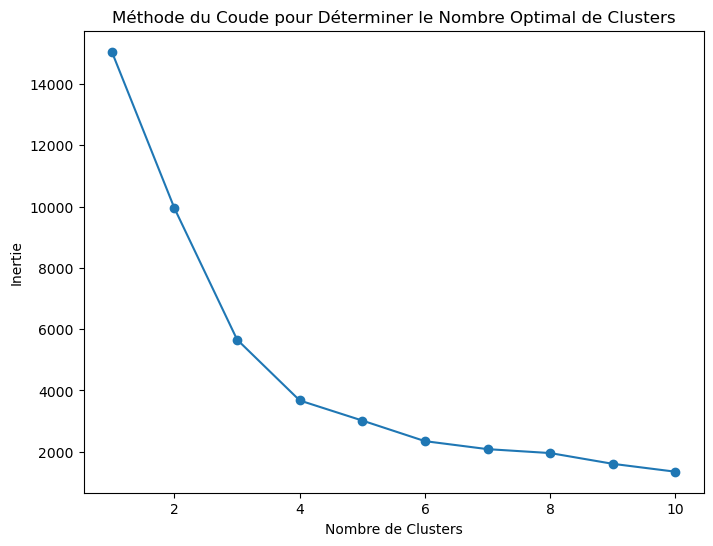

In [86]:
# Tracer la courbe de l'inertie
plt.figure(figsize=(8, 6))
plt.plot(cluster_range, inertia, marker='o')
plt.xlabel('Nombre de Clusters')
plt.ylabel("Inertie")
plt.title("Méthode du Coude pour Déterminer le Nombre Optimal de Clusters")
plt.show()

In [89]:
#### Score de Silhouette
from sklearn.metrics import silhouette_score

# Calculer le score de silhouette pour chaque nombre de clusters de 2 à 10
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(rfm_scaled)
    silhouette_scores.append(silhouette_score(rfm_scaled, labels))

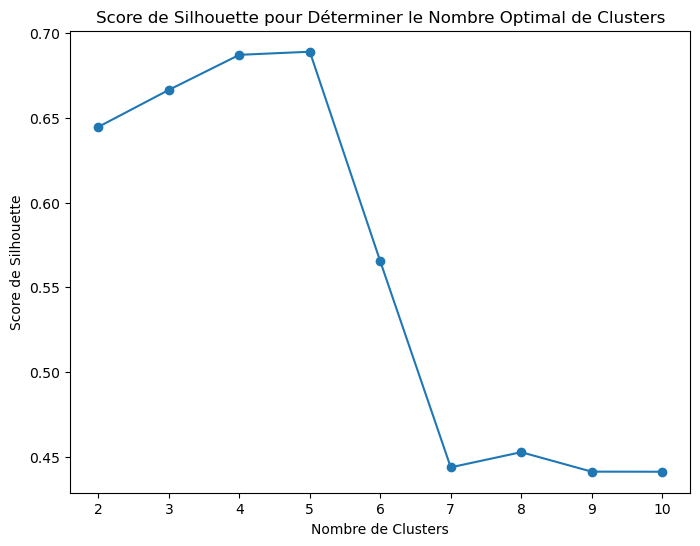

In [90]:
# Tracer la courbe des scores de silhouette
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Nombre de Clusters')
plt.ylabel("Score de Silhouette")
plt.title("Score de Silhouette pour Déterminer le Nombre Optimal de Clusters")
plt.show()

In [93]:
 #### Ajustement des Paramètres de Clustering
## Exemple avec K-means
# Appliquer K-means avec le nombre optimal de clusters
optimal_k = 4  # par exemple
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
rfm_scaled['Cluster'] = kmeans.fit_predict(rfm_scaled)

In [95]:
# Visualiser la taille des clusters pour vérifier leur répartition
print(rfm_scaled['Cluster'].value_counts())

Cluster
0    3208
1    1048
3      53
2       5
Name: count, dtype: int64


In [97]:
##### Exemple avec DBSCAN (Density-Based Spatial Clustering of Applications with Noise)
from sklearn.cluster import DBSCAN

# Tester différentes valeurs de eps et min_samples
dbscan = DBSCAN(eps=0.5, min_samples=10)
rfm_scaled['DBSCAN_Cluster'] = dbscan.fit_predict(rfm_scaled)

In [99]:
# Examiner la répartition des clusters
print(rfm_scaled['DBSCAN_Cluster'].value_counts())

DBSCAN_Cluster
 0    3186
 1    1041
-1      87
Name: count, dtype: int64


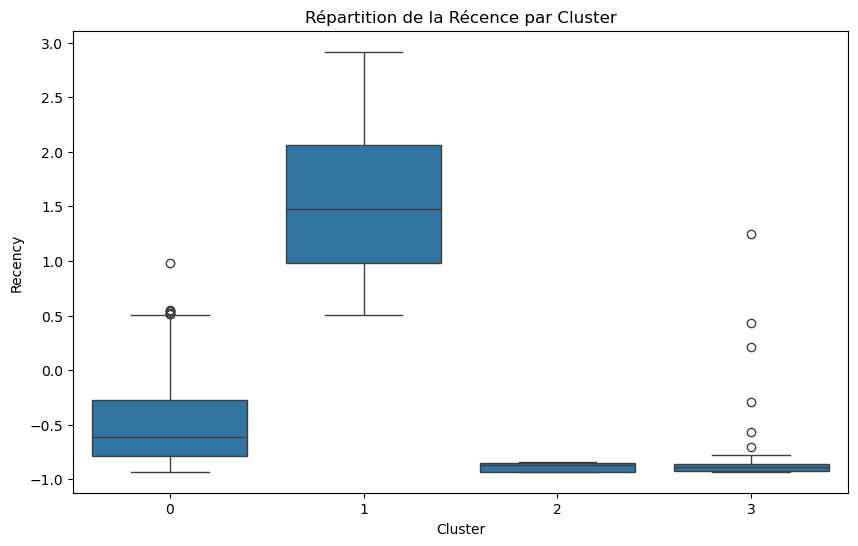

In [101]:
###### Visualisations avec des Boîtes à Moustache
import matplotlib.pyplot as plt
import seaborn as sns

# Créer une boîte à moustache pour la récence par cluster
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='Recency', data=rfm_scaled)
plt.title("Répartition de la Récence par Cluster")
plt.show()

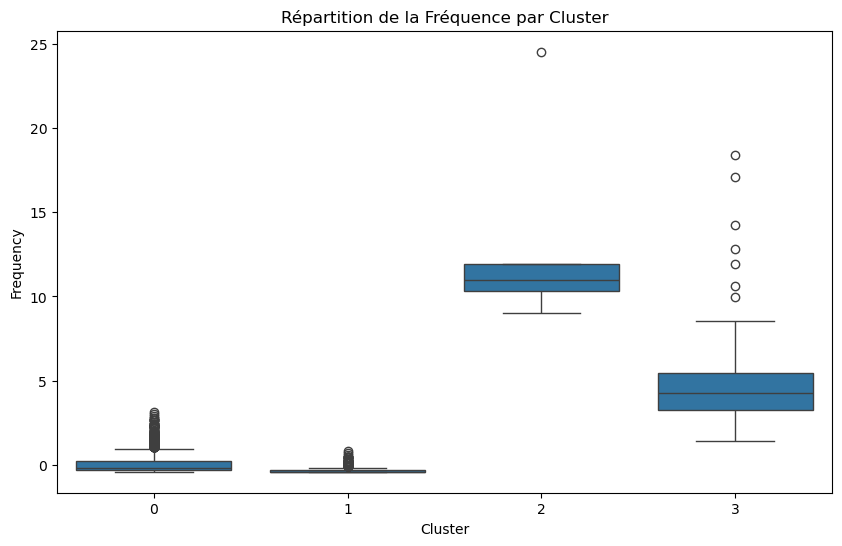

In [103]:
# Boîte à moustache pour la fréquence par cluster
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='Frequency', data=rfm_scaled)
plt.title("Répartition de la Fréquence par Cluster")
plt.show()

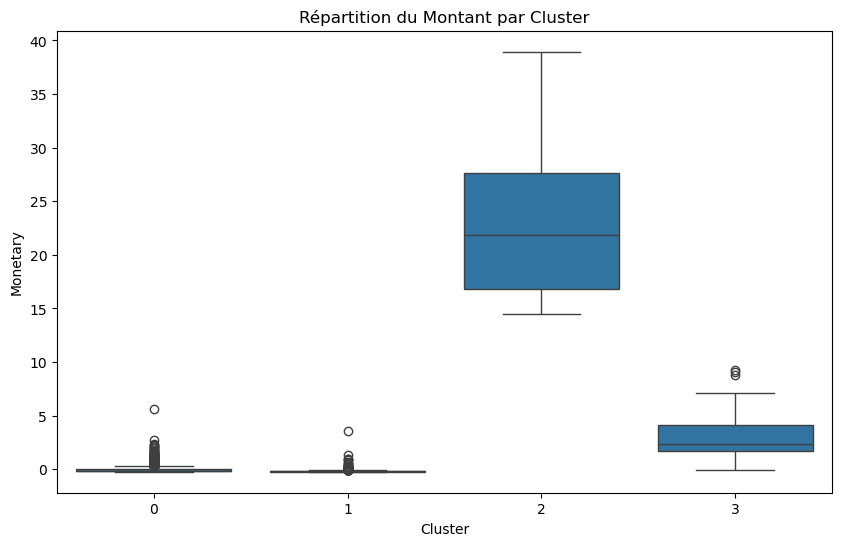

In [105]:
# Boîte à moustache pour le montant par cluster
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='Monetary', data=rfm_scaled)
plt.title("Répartition du Montant par Cluster")
plt.show()

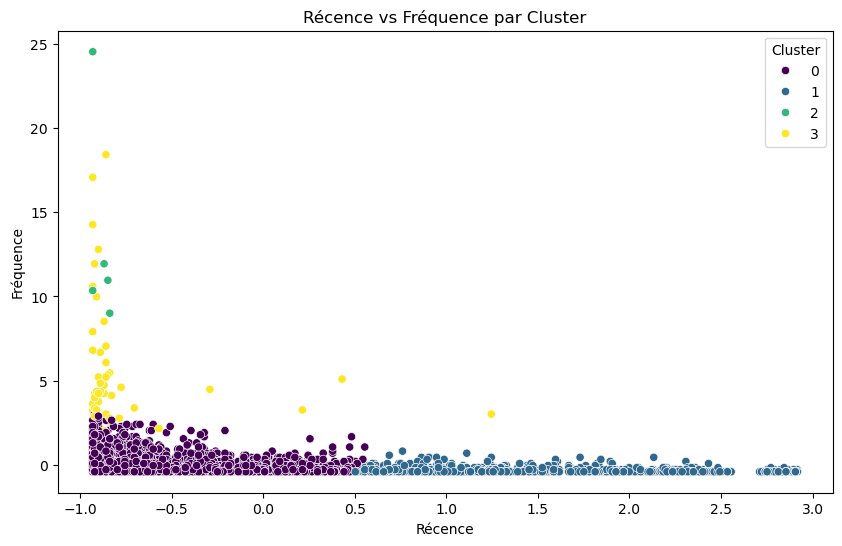

In [107]:
###### Comparaison des Clusters avec des Nuages de Points
# Nuage de points Récence vs Fréquence coloré par cluster
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Recency', y='Frequency', hue='Cluster', data=rfm_scaled, palette='viridis')
plt.title("Récence vs Fréquence par Cluster")
plt.xlabel("Récence")
plt.ylabel("Fréquence")
plt.show()

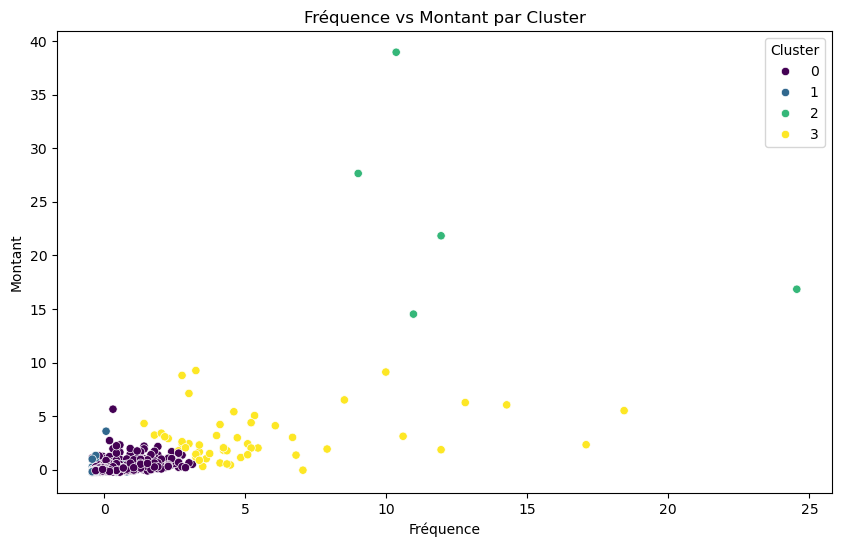

In [108]:
# Nuage de points Fréquence vs Montant coloré par cluster
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Frequency', y='Monetary', hue='Cluster', data=rfm_scaled, palette='viridis')
plt.title("Fréquence vs Montant par Cluster")
plt.xlabel("Fréquence")
plt.ylabel("Montant")
plt.show()

In [110]:
######## Comparaison des Clusters avec des Graphiques à Barres
# Calculer les moyennes des indicateurs RFM pour chaque cluster
rfm_cluster_means = rfm_scaled.groupby('Cluster').mean()

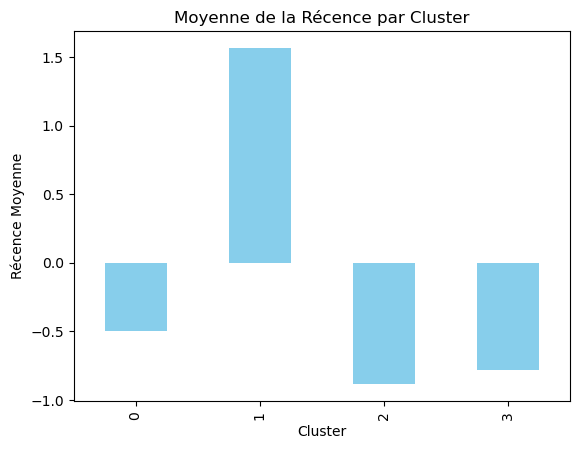

In [113]:
# Graphique à barres des moyennes de la Récence par cluster
rfm_cluster_means['Recency'].plot(kind='bar', color='skyblue')
plt.title("Moyenne de la Récence par Cluster")
plt.xlabel("Cluster")
plt.ylabel("Récence Moyenne")
plt.show()

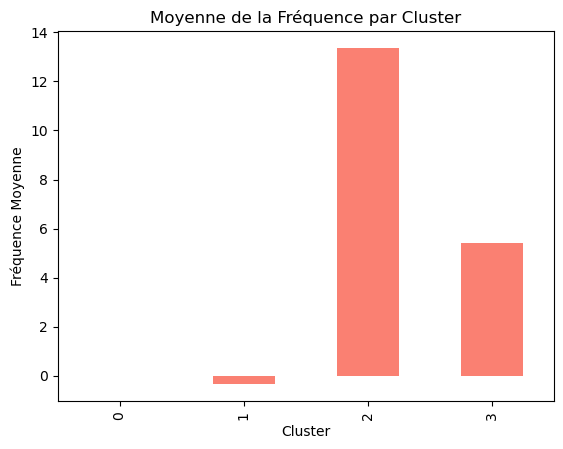

In [115]:
# Graphique à barres des moyennes de la Fréquence par cluster
rfm_cluster_means['Frequency'].plot(kind='bar', color='salmon')
plt.title("Moyenne de la Fréquence par Cluster")
plt.xlabel("Cluster")
plt.ylabel("Fréquence Moyenne")
plt.show()

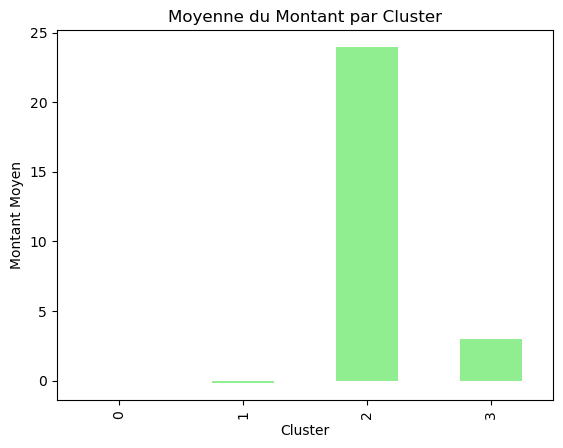

In [117]:
# Graphique à barres des moyennes du Montant par cluster
rfm_cluster_means['Monetary'].plot(kind='bar', color='lightgreen')
plt.title("Moyenne du Montant par Cluster")
plt.xlabel("Cluster")
plt.ylabel("Montant Moyen")
plt.show()